In [18]:
%load_ext autoreload
%autoreload 2

In [19]:

import os
import json

# Data Wrangling
import h5py
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from utils.utils_bouts import NameCat,NameCatSym
from classification.template_bouts import Knn_Training_Dataset

'''arr = np.load('./classification/CleanBalancedBoutDataset.npz')
ref_bouts = arr['bouts']
labels = arr['label']

N_Sample = 1400
balanced_bouts = np.zeros((0,ref_bouts.shape[1]))
balanced_labels = []
for b in range(13):
    id_ = np.where(labels==b)[0]
    np.random.seed(42)
    id_balanced = np.random.permutation(id_)[:N_Sample]
    balanced_bouts = np.vstack((balanced_bouts,ref_bouts[id_balanced,:]))
    balanced_labels = balanced_labels + [b]*N_Sample

balanced_labels = np.array(balanced_labels)
balanced_bouts = np.reshape(balanced_bouts,(balanced_bouts.shape[0],10,140))


#ref_bouts = balanced_bouts 
#labels = balanced_labels

# Put in natural unit radian and mm:
balanced_bouts[:,7,:],balanced_bouts[:,8,:],balanced_bouts[:,9,:] = balanced_bouts[:,7,:]*5,balanced_bouts[:,8,:]*5,balanced_bouts[:,9,:]/2 # Rescaling to make x,y in mm and angle in radian
'''

In [20]:
#np.savez('kNN_Training_Dataset.npz', bouts=balanced_bouts, labels=balanced_labels)


In [21]:
knn_training_dataset = Knn_Training_Dataset(fps=700,augmentation_delays=[0],ignore_CS=True)

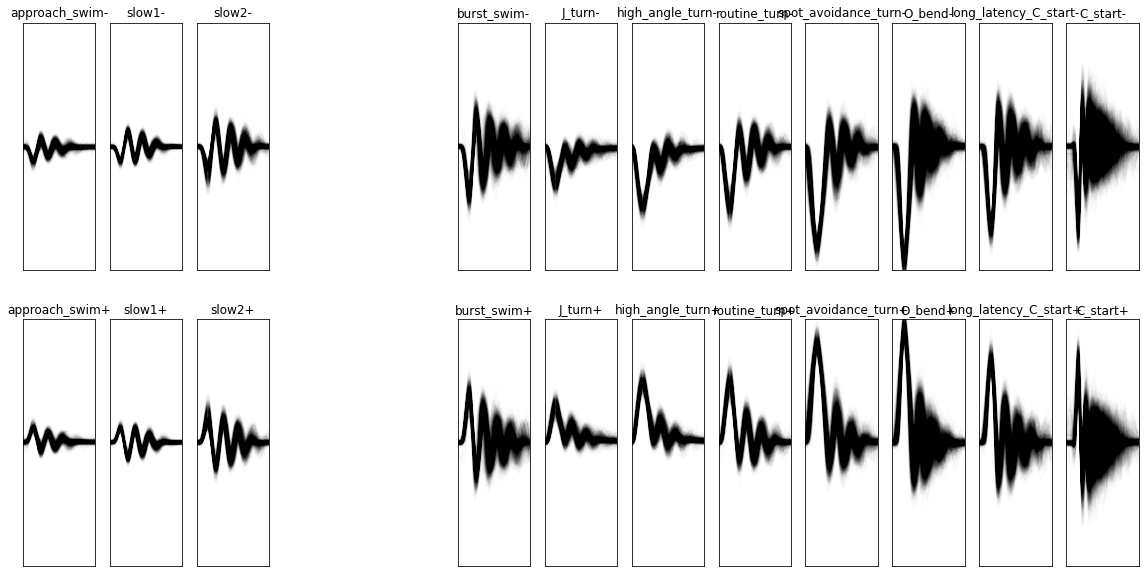

In [23]:
import matplotlib.gridspec as gridspec
from matplotlib import colors

fig, ax = plt.subplots(facecolor='white',figsize=(20,10)) 

G = gridspec.GridSpec(2,13)
ax0 = {}

for k,b in enumerate(np.unique((knn_training_dataset.labels))):
    b = int(b)
    sg = 1 if b<13 else -1
    ax0 = plt.subplot(G[int((sg+1)*1/2),b%13])
    ax0.set_title(NameCat[b])
    
    id = np.where(knn_training_dataset.labels==b)[0]       
    if len(id)>0:
        id = id[0:1000]
        ax0.plot(knn_training_dataset.tail[id,-1,:].T,'k',alpha=0.01)

    ax0.set_xlim(0,120)
    ax0.set_ylim(-3.6,3.6)
    
    ax0.set_xticks([])
    ax0.set_yticks([])
    
plt.show()


# Save dataset for Bill:



In [24]:
tail = knn_training_dataset.tail[:,-1,:]
print(tail.shape)


(30800, 140)


In [14]:
20*1000/700

28.571428571428573

In [15]:
from super_resolution.downsampling import convert_ms_to_frames

20

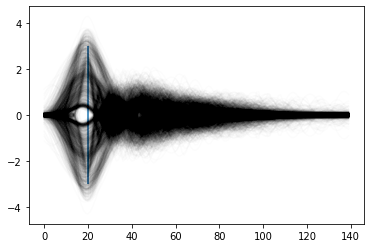

In [17]:
plt.plot(knn_training_dataset.tail[::10,6,:].T,'k',alpha=0.01)
plt.vlines(20,-3,3)
plt.show()

# Color code

In [25]:
#dict_color_species = {'Tu':'#f94144','Giant':'#90be6d','Danionella':'#277da1'}
dict_color_bouts = {}
dict_color_bouts[0] = '#82cfff'
dict_color_bouts[1] = '#4589ff'
dict_color_bouts[2] = '#0000c8'
dict_color_bouts[3] = '#5d5d66'
dict_color_bouts[4] = '#000000'
dict_color_bouts[5] = '#fcaf6d'
dict_color_bouts[6] = '#ffb3b8'
dict_color_bouts[7] = '#08bdba'
dict_color_bouts[8] = '#24a148'
dict_color_bouts[9] = '#9b82f3'
dict_color_bouts[10] = '#ee5396'
dict_color_bouts[11] = '#e3bc13'
dict_color_bouts[12] = '#fa4d56'

dict_color_bouts[13] = '#82cfff'
dict_color_bouts[14] = '#4589ff'
dict_color_bouts[15] = '#0000c8'
dict_color_bouts[16] = '#5d5d66'
dict_color_bouts[17] = '#000000'
dict_color_bouts[18] = '#fcaf6d'
dict_color_bouts[19] = '#ffb3b8'
dict_color_bouts[20] = '#08bdba'
dict_color_bouts[21] = '#24a148'
dict_color_bouts[22] = '#9b82f3'
dict_color_bouts[23] = '#ee5396'
dict_color_bouts[24] = '#e3bc13'
dict_color_bouts[25] = '#fa4d56'
#dict_color_species = {'Tu':(249/255., 65/255., 68/255.),'Giant':(144/255., 190/255., 109/255.),'Danionella':(39/255., 125/255., 161/255.)}

In [26]:
list_color_no_CS = ['#82cfff','#4589ff','#0000c8','#fcaf6d','#ffb3b8','#08bdba','#24a148','#9b82f3','#ee5396','#e3bc13','#fa4d56']
list_color_w_CS = ['#82cfff','#4589ff','#0000c8','#5d5d66','#000000','#fcaf6d','#ffb3b8','#08bdba','#24a148','#9b82f3','#ee5396','#e3bc13','#fa4d56']

NameCatSym_w_CS = []

NameCatSym_w_CS=['approach_swim', 'slow1', 'slow2', 'slow_capture_swim','fast_capture_swim', 'burst_swim', 'J_turn', 'high_angle_turn','routine_turn', 'spot_avoidance_turn', 'O_bend','long_latency_C_start', 'C_start']
NameCatSym_no_CS=['approach_swim', 'slow1', 'slow2', 'burst_swim', 'J_turn', 'high_angle_turn','routine_turn', 'spot_avoidance_turn', 'O_bend','long_latency_C_start', 'C_start']

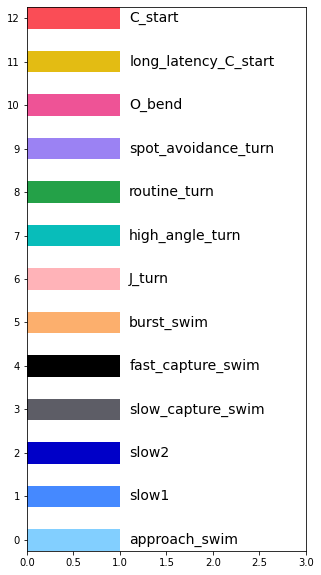

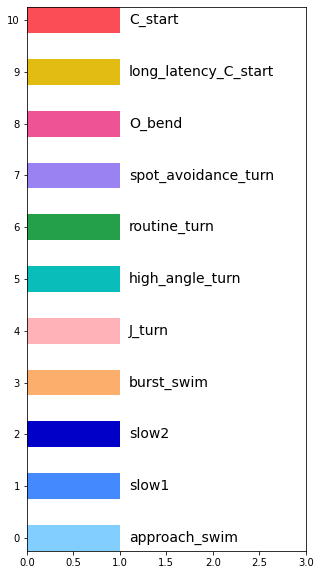

In [27]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize=(5,10))
for i,c in enumerate(list_color_w_CS):
    ax.add_patch(Rectangle(xy=(0,i*2), width=1,
                      height=1, facecolor=c))
    ax.text(1.1, i*2+0.5, NameCatSym_w_CS[i], fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')                     
ax.set_ylim(0,25)
ax.set_xlim(0,3)
ax.set_yticks(np.arange(0,26,2)+0.5)
ax.set_yticklabels(np.arange(13))
plt.show()

from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize=(5,10))
for i,c in enumerate(list_color_no_CS):
    ax.add_patch(Rectangle(xy=(0,i*2), width=1,
                      height=1, facecolor=c))
    ax.text(1.1, i*2+0.5, NameCatSym_no_CS[i], fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')                     
ax.set_ylim(0,21)
ax.set_xlim(0,3)
ax.set_yticks(np.arange(0,22,2)+0.5)
ax.set_yticklabels(np.arange(11))
plt.show()

# UMAP

In [28]:
import umap
import umap.plot

In [29]:
reducer = umap.UMAP(n_components=2,verbose=True)
embedding = reducer.fit_transform(tail)#knn_training_dataset.tail_flat)

UMAP(dens_frac=0.0, dens_lambda=0.0, verbose=True)
Construct fuzzy simplicial set
Tue Jul 12 15:19:04 2022 Finding Nearest Neighbors
Tue Jul 12 15:19:04 2022 Building RP forest with 14 trees
Tue Jul 12 15:19:05 2022 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	Stopping threshold met -- exiting after 3 iterations
Tue Jul 12 15:19:27 2022 Finished Nearest Neighbor Search
Tue Jul 12 15:19:30 2022 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Tue Jul 12 15:19:47 2022 Finished embedding


<Figure size 1440x1440 with 0 Axes>

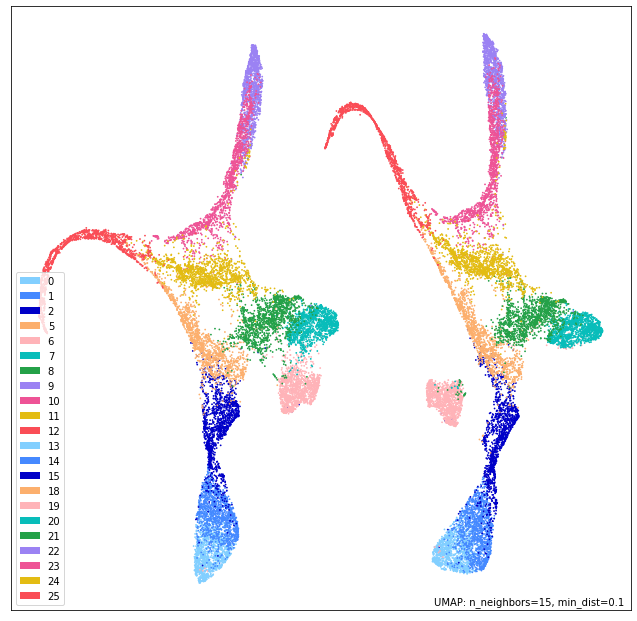

In [30]:
plt.figure(figsize=(20,20))
#umap.plot.points(reducer,labels=bouts_df.strain,color_key_cmap='plasma')
umap.plot.points(reducer,labels=knn_training_dataset.labels,color_key=dict_color_bouts)
plt.draw()

# Trajectory Template

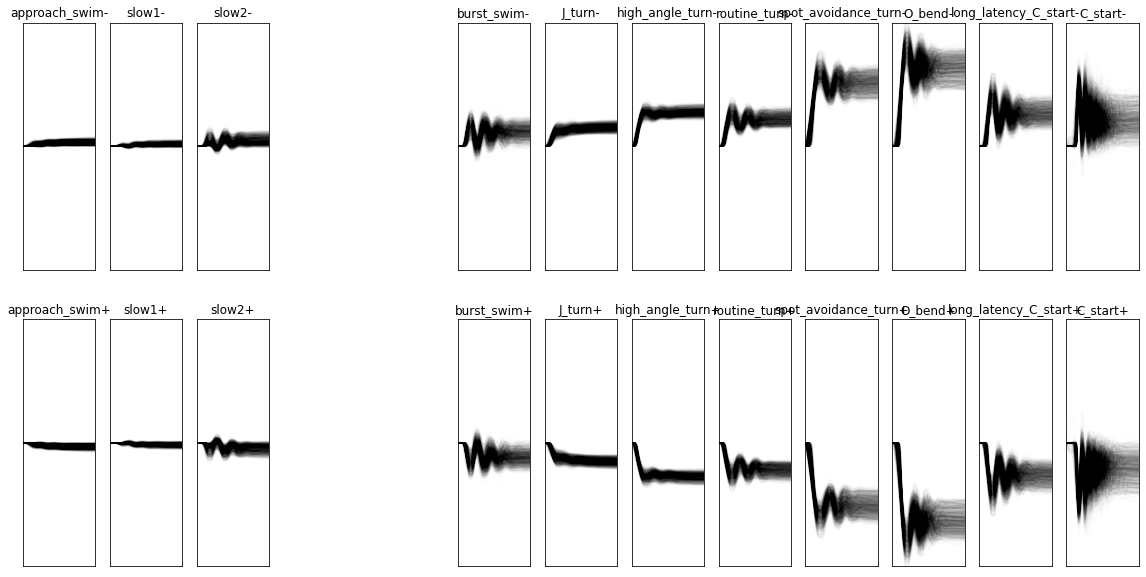

In [24]:
import matplotlib.gridspec as gridspec
from matplotlib import colors

fig, ax = plt.subplots(facecolor='white',figsize=(20,10)) 

G = gridspec.GridSpec(2,13)
ax0 = {}

for k,b in enumerate(np.unique((knn_training_dataset.labels))):
    b = int(b)
    sg = 1 if b<13 else -1
    ax0 = plt.subplot(G[int((sg+1)*1/2),b%13])
    ax0.set_title(NameCat[b])
    
    id = np.where(knn_training_dataset.labels==b)[0]       
    if len(id)>0:
        id = id[0:1000]
        ax0.plot(knn_training_dataset.traj[id,-1,:].T,'k',alpha=0.01)

    ax0.set_xlim(0,120)
    ax0.set_ylim(-3.6,3.6)
    
    ax0.set_xticks([])
    ax0.set_yticks([])
    
plt.show()


In [31]:
scale = np.std(np.abs(knn_training_dataset.traj),axis=(0,2))

traj_flat_scaled = knn_training_dataset.traj_flat
traj_flat_scaled[:,0:140] = traj_flat_scaled[:,0:140] /1.6
traj_flat_scaled[:,140:2*140] = traj_flat_scaled[:,140:2*140] /1.9
traj_flat_scaled[:,2*140:] = traj_flat_scaled[:,2*140:] /0.7

In [34]:
reducer = umap.UMAP(n_components=2,verbose=True)
embedding = reducer.fit_transform(knn_training_dataset.traj_flat)

UMAP(dens_frac=0.0, dens_lambda=0.0, verbose=True)
Construct fuzzy simplicial set
Mon Jun 20 17:10:02 2022 Finding Nearest Neighbors
Mon Jun 20 17:10:02 2022 Building RP forest with 14 trees
Mon Jun 20 17:10:02 2022 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	Stopping threshold met -- exiting after 2 iterations
Mon Jun 20 17:10:03 2022 Finished Nearest Neighbor Search
Mon Jun 20 17:10:04 2022 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon Jun 20 17:10:19 2022 Finished embedding


<Figure size 1440x1440 with 0 Axes>

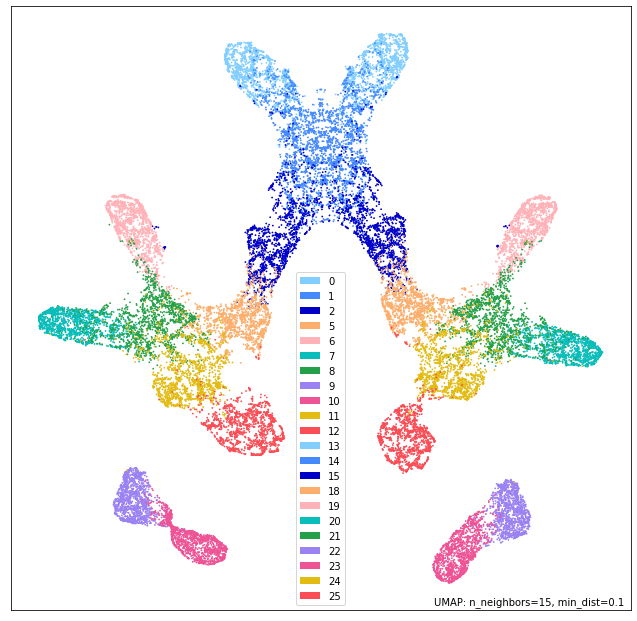

In [35]:
plt.figure(figsize=(20,20))
#umap.plot.points(reducer,labels=bouts_df.strain,color_key_cmap='plasma')
umap.plot.points(reducer,labels=knn_training_dataset.labels,color_key=dict_color_bouts)
plt.draw()

# Tail and Traj

In [33]:
reducer = umap.UMAP(n_components=2,verbose=True)
embedding = reducer.fit_transform(knn_training_dataset.tail_and_traj_flat)

UMAP(dens_frac=0.0, dens_lambda=0.0, verbose=True)
Construct fuzzy simplicial set
Tue Jul 12 17:52:51 2022 Finding Nearest Neighbors
Tue Jul 12 17:52:51 2022 Building RP forest with 14 trees
Tue Jul 12 17:52:52 2022 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	Stopping threshold met -- exiting after 3 iterations
Tue Jul 12 17:52:53 2022 Finished Nearest Neighbor Search
Tue Jul 12 17:52:54 2022 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Tue Jul 12 17:53:11 2022 Finished embedding


In [35]:
knn_training_dataset.tail_and_traj_flat.shape

(30800, 1400)

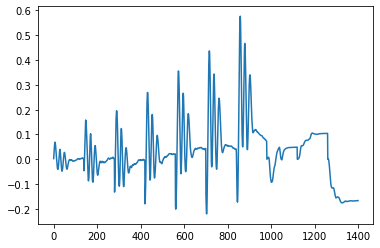

In [37]:
plt.plot(knn_training_dataset.tail_and_traj_flat[0,:])

In [43]:
id = np.arange(6*140,7*140).tolist()+np.arange(9*140,10*140).tolist()
tail_head = knn_training_dataset.tail_and_traj_flat[:,id]

In [48]:
knn_training_dataset.labels.shape[0]/2

15400.0

In [49]:
tail_head = knn_training_dataset.tail_and_traj_flat[:,id]
tail_head = tail_head[0:15400]
label = knn_training_dataset.labels[0:15400]

In [50]:
reducer = umap.UMAP(n_components=2,verbose=True)
embedding = reducer.fit_transform(tail_head)

UMAP(dens_frac=0.0, dens_lambda=0.0, verbose=True)
Construct fuzzy simplicial set
Tue Jul 12 17:58:49 2022 Finding Nearest Neighbors
Tue Jul 12 17:58:49 2022 Building RP forest with 11 trees
Tue Jul 12 17:58:49 2022 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	Stopping threshold met -- exiting after 3 iterations
Tue Jul 12 17:58:50 2022 Finished Nearest Neighbor Search
Tue Jul 12 17:58:50 2022 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Tue Jul 12 17:59:00 2022 Finished embedding


<Figure size 1440x1440 with 0 Axes>

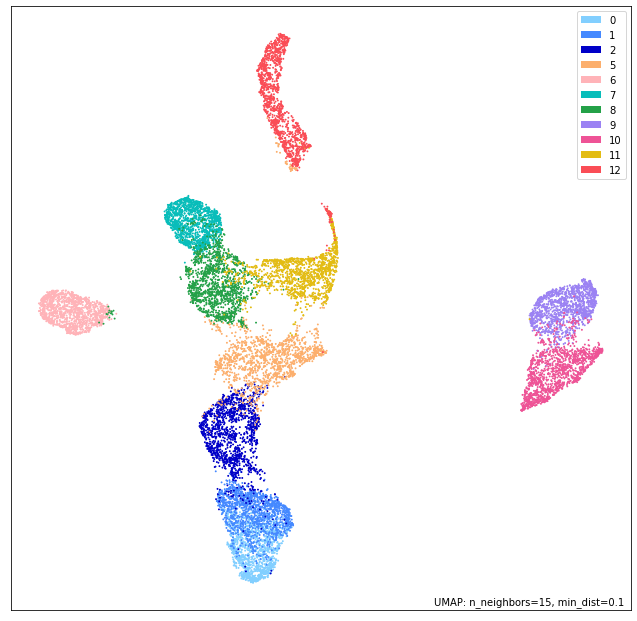

In [51]:
plt.figure(figsize=(20,20))
#umap.plot.points(reducer,labels=bouts_df.strain,color_key_cmap='plasma')
umap.plot.points(reducer,labels=label,color_key=dict_color_bouts)
plt.draw()

# Save for ilqr:

In [42]:
tail = knn_training_dataset.tail
traj = knn_training_dataset.traj
labels = knn_training_dataset.labels
print(tail.shape,traj.shape,labels.shape)

(30800, 7, 140) (30800, 3, 140) (30800,)


9


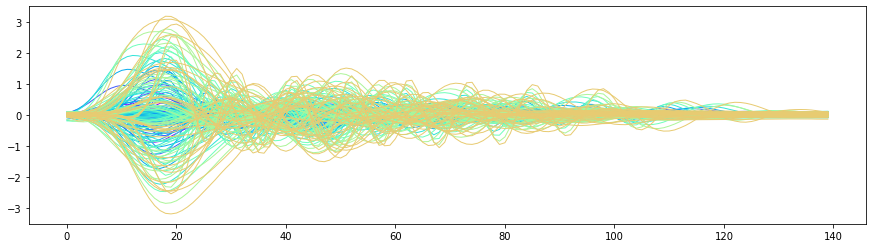

In [62]:
import matplotlib as mpl


cmap = plt.cm.rainbow  
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist = cmaplist[::30]
print(len(cmaplist))
plt.figure(figsize=(15,4))
for i in range(7):
    plt.plot(tail[::1000,i,:].T,color=cmaplist[i],lw=1)
plt.show()

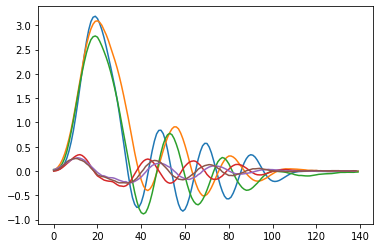

In [74]:
i = np.random.randint(tail.shape[0])
plt.plot(tail[i:i+3,-1,:].T)
plt.plot(np.diff(tail[i:i+3,-1,:]).T)

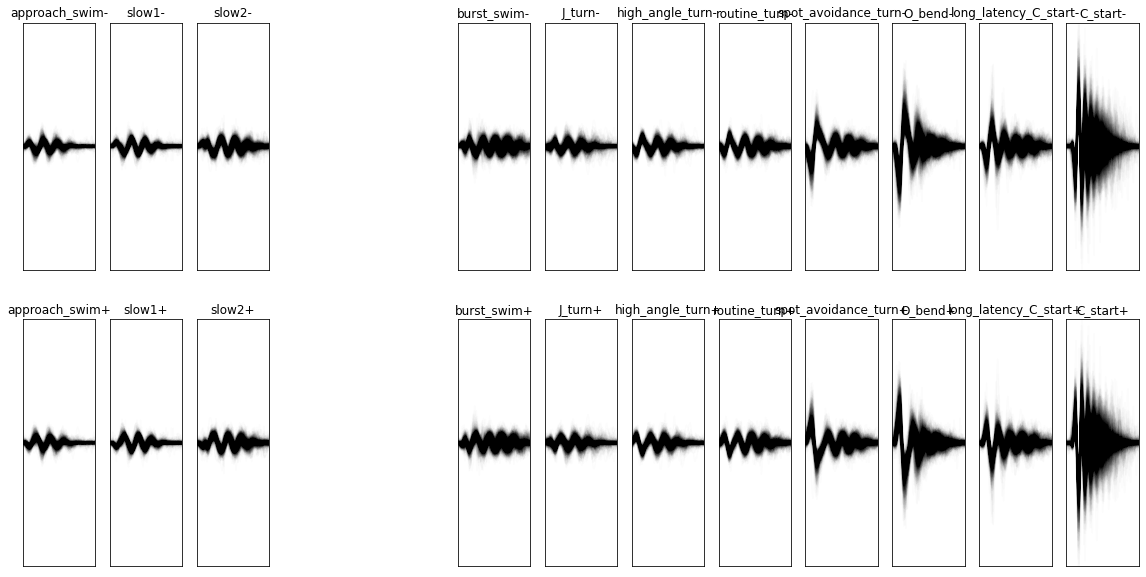

In [77]:
import matplotlib.gridspec as gridspec
from matplotlib import colors

fig, ax = plt.subplots(facecolor='white',figsize=(20,10)) 

G = gridspec.GridSpec(2,13)
ax0 = {}

for k,b in enumerate(np.unique((knn_training_dataset.labels))):
    b = int(b)
    sg = 1 if b<13 else -1
    ax0 = plt.subplot(G[int((sg+1)*1/2),b%13])
    ax0.set_title(NameCat[b])
    
    id = np.where(knn_training_dataset.labels==b)[0]       
    if len(id)>0:
        id = id[0:1000]
        ax0.plot(np.diff(knn_training_dataset.tail[id,0,:]).T,'k',alpha=0.01)

    ax0.set_xlim(0,120)
    ax0.set_ylim(-0.3,0.3)
    
    ax0.set_xticks([])
    ax0.set_yticks([])
    
plt.show()


In [80]:
# Increase delay before bouts:

balanced_bouts = np.load('balanced_dataset/tail_angle.npy')
balanced_bouts_raw =np.load('balanced_dataset/tail_angle_raw.npy')
balanced_label = np.load('balanced_dataset/bout_category.npy')
balanced_fish_id =  np.load('balanced_dataset/fish_id.npy')

In [97]:
balanced_bouts.shape

(36400, 7, 160)

In [99]:
knn_training_dataset.tail.shape

(30800, 7, 140)

In [184]:

Y = np.zeros((0,140))
Y_no_shift = np.zeros((0,160))
for i in range(20,21):
    Y = np.vstack((Y,balanced_bouts[:,-1,i:i+140]))
    Y_no_shift = np.vstack((Y_no_shift,balanced_bouts[:,-1,:]))


In [185]:
X = knn_training_dataset.tail[:,-1,:]

In [186]:
X.shape,Y.shape

((30800, 140), (36400, 140))

In [187]:
from sklearn.metrics import pairwise_distances_chunked

In [188]:
from sklearn.neighbors import KNeighborsClassifier


In [189]:
##### Compute NN #####
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(Y, np.random.randint(0,10,len(Y)))
res = knn.kneighbors(X[:,:])

id_nearest = res[1][:,0]

In [190]:
X.shape

(30800, 140)

In [191]:
Y.shape

(36400, 140)

In [192]:
id_nearest

array([16471, 22426,  4972, ...,  2570, 24973, 11193], dtype=int64)

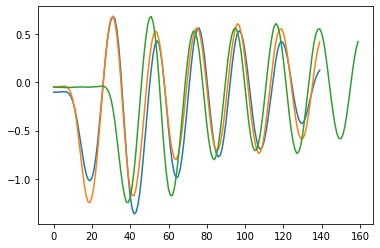

In [195]:
i = np.random.randint(knn_training_dataset.tail.shape[0])
x = knn_training_dataset.tail[i,-1,:]
j = id_nearest[i]#np.argmin(np.linalg.norm(X-x[np.newaxis,:],axis=1))
plt.plot(x)
plt.plot(Y[j,:])
plt.plot(Y_no_shift[j,:])

In [198]:
selected_bouts = balanced_bouts[id_nearest,:,:]
selected_bouts_raw = balanced_bouts_raw[id_nearest,:,:]
selected_labels = knn_training_dataset.labels
selected_fish_id = balanced_fish_id[id_nearest]

selected_approx_traj = knn_training_dataset.traj

In [202]:
selected_bouts.shape

(30800, 7, 160)

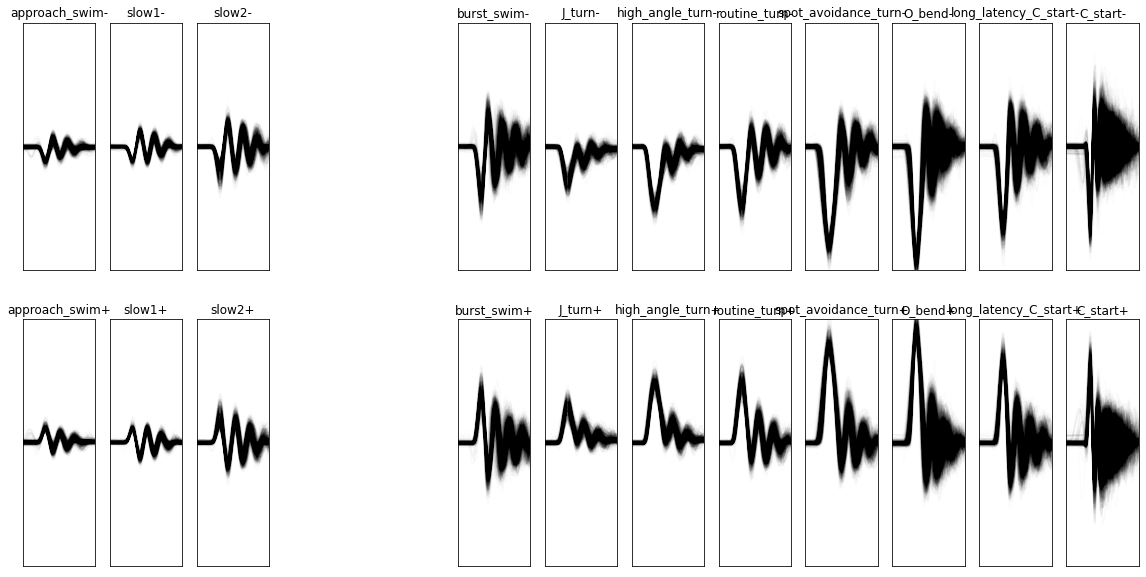

In [200]:
import matplotlib.gridspec as gridspec
from matplotlib import colors

fig, ax = plt.subplots(facecolor='white',figsize=(20,10)) 

G = gridspec.GridSpec(2,13)
ax0 = {}

for k,b in enumerate(np.unique(selected_labels)):
    b = int(b)
    sg = 1 if b<13 else -1
    ax0 = plt.subplot(G[int((sg+1)*1/2),b%13])
    ax0.set_title(NameCat[b])
    
    id = np.where(selected_labels==b)[0]       
    if len(id)>0:
        id = id[0:1000]
        ax0.plot(selected_bouts[id,-1,:].T,'k',alpha=0.01)

    ax0.set_xlim(0,120)
    #ax0.set_ylim(-0.3,0.3)
    ax0.set_ylim(-3.6,3.6)
    ax0.set_xticks([])
    ax0.set_yticks([])
    
plt.show()


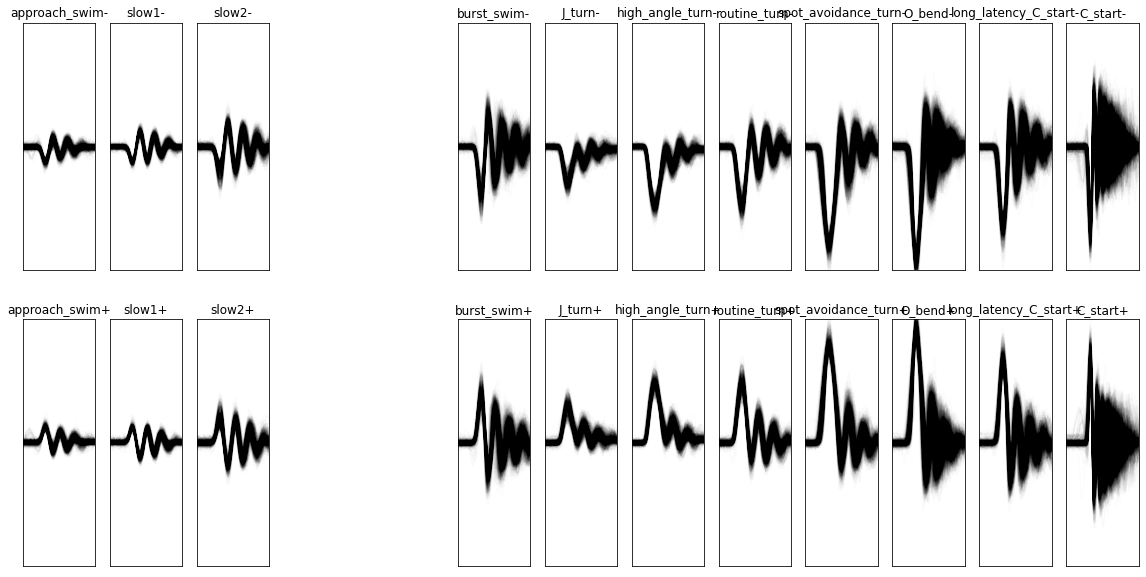

In [201]:
import matplotlib.gridspec as gridspec
from matplotlib import colors

fig, ax = plt.subplots(facecolor='white',figsize=(20,10)) 

G = gridspec.GridSpec(2,13)
ax0 = {}

for k,b in enumerate(np.unique(selected_labels)):
    b = int(b)
    sg = 1 if b<13 else -1
    ax0 = plt.subplot(G[int((sg+1)*1/2),b%13])
    ax0.set_title(NameCat[b])
    
    id = np.where(selected_labels==b)[0]       
    if len(id)>0:
        id = id[0:1000]
        ax0.plot(selected_bouts_raw[id,-1,:].T,'k',alpha=0.01)

    ax0.set_xlim(0,120)
    #ax0.set_ylim(-0.3,0.3)
    ax0.set_ylim(-3.6,3.6)
    ax0.set_xticks([])
    ax0.set_yticks([])
    
plt.show()


In [257]:
scale = np.linalg.norm(selected_bouts)/np.linalg.norm(np.diff(selected_bouts,axis=2))
selected_bouts_diff = np.diff(selected_bouts,axis=2)*scale
selected_bouts_raw_diff = np.diff(selected_bouts_raw,axis=2)*scale


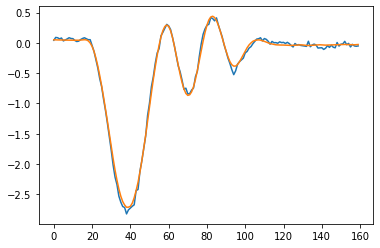

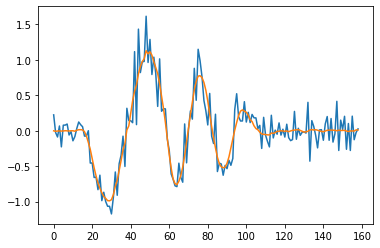

In [260]:
i = np.random.randint(selected_bouts.shape[0])
plt.figure()
plt.plot(selected_bouts_raw[i,-1,:])
plt.plot(selected_bouts[i,-1,:])
plt.show()
plt.figure()
plt.plot(selected_bouts_raw_diff[i,-1,:])
plt.plot(selected_bouts_diff[i,-1,:])
plt.show()
#plt.plot(selected_bouts_raw[i,-1,:])

In [264]:
# Save all:
print(selected_bouts_raw.shape,selected_bouts_raw_diff.shape)
print(selected_bouts.shape,selected_bouts_diff.shape)
print(selected_approx_traj.shape)
print(selected_fish_id.shape)
print(selected_labels.shape)

(30800, 7, 160) (30800, 7, 159)
(30800, 7, 160) (30800, 7, 159)
(30800, 3, 140)
(30800,)
(30800,)


In [267]:
np.save('ilqr_vae_dataset/tail_angle_smooth.npy',selected_bouts)
np.save('ilqr_vae_dataset/tail_angle_raw.npy',selected_bouts_raw)
np.save('ilqr_vae_dataset/tail_angle_smooth_diff.npy',selected_bouts_diff)
np.save('ilqr_vae_dataset/tail_angle_raw_diff.npy',selected_bouts_raw_diff)
np.save('ilqr_vae_dataset/labels.npy',selected_labels)
np.save('ilqr_vae_dataset/fish_id.npy',selected_fish_id)
np.save('ilqr_vae_dataset/approx_traj.npy',selected_approx_traj)